<a href="https://colab.research.google.com/github/AvivGelfand/Modern-Statistical-Strategies-Course/blob/main/Modern_Statistical_Data_Analysis_Ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topics

Based on the image, the topics covered in the exercise questions are:

1. Multiple hypothesis testing
  * Bonferroni correction
  * Benjamini-Hochberg (BH) procedure
  * False discovery rate (FDR)
  * Positive/negative dependence between hypotheses
  * Interpreting 2D diagrams of p-values


2. Multiple hypothesis testing on real data
  * Ranksum test for computing p-values
  * Bonferroni correction
  * Standard Benjamini-Hochberg (BH) procedure
  * Adaptive BH procedure (adjusting based on estimate of m0)
  * Visualizing sorted p-values and threshold lines



The overarching theme seems to be methods and calculations related to multiple hypothesis testing, including corrections for multiplicity, estimating false discovery rates, and visualizing/interpreting results.

Sure, I'd be happy to explain these topics in detail. Let's dive into each concept one by one.

### 1. Multiple Hypothesis Testing

In statistical analysis, multiple hypothesis testing refers to the process of simultaneously testing more than one hypothesis. When conducting multiple tests, the probability of making at least one Type I error (false positive) increases. This necessitates the use of corrections to control the overall error rate.

#### Bonferroni Correction
The Bonferroni correction is a simple and conservative method to control the family-wise error rate (FWER). It adjusts the significance level (α) by dividing it by the number of tests (m) being performed. If we have m hypotheses, we test each at the level of α/m.

$$ \text{Adjusted } \alpha = \frac{\alpha}{m} $$

For example, if you are conducting 10 tests and want a family-wise error rate of 0.05, each test should use a significance level of 0.005 (0.05/10).

#### Benjamini-Hochberg (BH) Procedure
The BH procedure is used to control the false discovery rate (FDR), which is the expected proportion of false positives among the rejected hypotheses. It is less conservative than the Bonferroni correction and is widely used in multiple testing scenarios.

The steps of the BH procedure are as follows:
1. Rank the p-values from all tests in ascending order: $ p_{(1)}, p_{(2)}, ..., p_{(m)} $.
2. Calculate the critical value for each test: $ \frac{i}{m} \cdot \alpha $, where $ i $ is the rank.
3. Find the largest $ k $ such that $ p_{(k)} \leq \frac{k}{m} \cdot \alpha $.
4. Reject all hypotheses with p-values $ \leq p_{(k)} $.

#### False Discovery Rate (FDR)
FDR is the expected proportion of Type I errors (false discoveries) among the rejected hypotheses. Controlling the FDR allows more discoveries (true positives) compared to controlling the FWER. It is especially useful in large-scale testing situations, like genomics and brain imaging studies.

#### Positive/Negative Dependence Between Hypotheses
When hypotheses are positively dependent, rejecting one hypothesis increases the likelihood of rejecting another. Conversely, negative dependence means rejecting one hypothesis decreases the likelihood of rejecting another. The dependency structure can affect the performance of multiple testing procedures. Most procedures, like the BH procedure, assume independence or positive dependence among tests.

#### Interpreting 2D Diagrams of p-values
2D diagrams of p-values plot the sorted p-values against their rank or expected order under the null hypothesis. These plots help visualize the distribution of p-values and assess the performance of multiple testing corrections.

### 2. Multiple Hypothesis Testing on Real Data

To apply these concepts to real data, let's consider practical steps and methods.

#### Ranksum Test for Computing P-values
The ranksum test (Mann-Whitney U test) is a non-parametric test used to compare two independent samples. It computes p-values for testing the null hypothesis that the two samples come from the same distribution.

#### Bonferroni Correction
Apply the Bonferroni correction to the p-values obtained from multiple ranksum tests by adjusting the significance level to $ \alpha/m $.

#### Standard Benjamini-Hochberg (BH) Procedure
Apply the BH procedure to control the FDR when analyzing multiple p-values. This involves ranking the p-values and finding the largest p-value that satisfies the BH criterion.

#### Adaptive BH Procedure (Adjusting Based on Estimate of m0)
The adaptive BH procedure adjusts the BH threshold based on an estimate of the number of true null hypotheses ($ m_0 $). This can lead to more powerful testing by allowing a higher threshold for rejecting hypotheses when $ m_0 $ is less than the total number of tests.

#### Visualizing Sorted P-values and Threshold Lines
To visualize the results, plot the sorted p-values along with the Bonferroni and BH threshold lines. This helps in understanding how many hypotheses are rejected under each correction method and the overall distribution of the p-values.

### Example Workflow

1. **Compute p-values**: Use the ranksum test to compute p-values for each hypothesis.
2. **Apply Bonferroni Correction**: Adjust the significance level for each test using $ \alpha/m $.
3. **Apply Standard BH Procedure**: Rank the p-values and apply the BH criterion to find the rejection threshold.
4. **Apply Adaptive BH Procedure**: Estimate $ m_0 $ and adjust the BH thresholds accordingly.
5. **Visualize Results**: Plot the sorted p-values and overlay the Bonferroni and BH thresholds to visualize which hypotheses are rejected.

### Visual Representation
Here is an example of visualizing sorted p-values with threshold lines:



```python
import numpy as np
import matplotlib.pyplot as plt

# Example data
p_values = np.random.uniform(0, 1, 100)
p_values.sort()

# Bonferroni threshold
alpha = 0.05
bonferroni_threshold = alpha / len(p_values)

# BH threshold
m = len(p_values)
bh_thresholds = [(i / m) * alpha for i in range(1, m + 1)]

# Plotting
plt.plot(p_values, label='P-values')
plt.plot([bonferroni_threshold] * m, label='Bonferroni Threshold', linestyle='--')
plt.plot(bh_thresholds, label='BH Threshold', linestyle='--')
plt.xlabel('Sorted Hypothesis')
plt.ylabel('P-value')
plt.legend()
plt.title('Sorted P-values with Bonferroni and BH Thresholds')
plt.show()
```



This example plots the sorted p-values with horizontal lines representing the Bonferroni and BH thresholds. Hypotheses with p-values below these lines are rejected.

By understanding and applying these methods, you can effectively manage the trade-off between discovery and error control in multiple hypothesis testing scenarios.

# 1. Multiple hypothesis testing


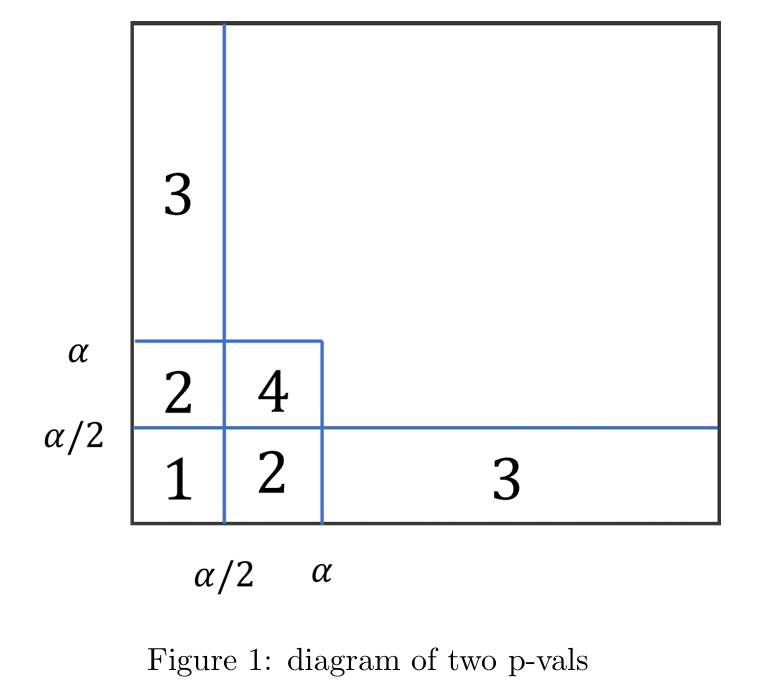

## 1. (a) Bonferroni correction VS. Benjamini-Hochberg (BH) Procedure


### Explanation and Approach



The question refers to a 2D diagram (Figure 1) which shows various regions based on two p-values $ p_1 $ and $ p_2 $. The rejection threshold for a single test is $ \alpha $.

The task is to determine the number of hypotheses (0, 1, or 2) that will be rejected in each of the regions (1, 2, 3, and 4) when using the Bonferroni correction and the Benjamini-Hochberg (BH) procedure.



**Bonferroni Correction**:
The Bonferroni correction adjusts the significance level to control the family-wise error rate (FWER). For two hypotheses, the Bonferroni correction sets the significance level to $ \frac{\alpha}{2} $ for each hypothesis. Thus, we reject $ H_0 $ if:
$$ p_1 \leq \frac{\alpha}{2} \quad \text{or} \quad p_2 \leq \frac{\alpha}{2} $$

**Benjamini-Hochberg (BH) Procedure**:
The BH procedure controls the false discovery rate (FDR). For two hypotheses, sort the p-values $ p_{(1)} $ and $ p_{(2)} $. Define the critical value as:
$$ p_{(i)} \leq \frac{i}{2} \alpha \quad \text{for} \quad i = 1, 2 $$

### Solution

Let's analyze the rejection criteria for each region.

1. **Region 1**: $ p_1 \leq \frac{\alpha}{2} $ and $ p_2 \leq \frac{\alpha}{2} $
2. **Region 2**: $ p_1 \leq \frac{\alpha}{2} $ and $ \frac{\alpha}{2} < p_2 \leq \alpha $
3. **Region 3**: $ \frac{\alpha}{2} < p_1 \leq \alpha $ and $ \frac{\alpha}{2} < p_2 \leq \alpha $
4. **Region 4**: $ \frac{\alpha}{2} < p_1 \leq \alpha $ and $ p_2 \leq \frac{\alpha}{2} $

#### Bonferroni Correction:

- **Region 1**: Both $ p_1 $ and $ p_2 $ are less than or equal to $ \frac{\alpha}{2} $. Therefore, both hypotheses are rejected.
- **Region 2**: $ p_1 $ is less than or equal to $ \frac{\alpha}{2} $, but $ p_2 $ is greater than $ \frac{\alpha}{2} $. Only $ p_1 $ is rejected.
- **Region 3**: Both $ p_1 $ and $ p_2 $ are greater than $ \frac{\alpha}{2} $. Neither hypothesis is rejected.
- **Region 4**: $ p_2 $ is less than or equal to $ \frac{\alpha}{2} $, but $ p_1 $ is greater than $ \frac{\alpha}{2} $. Only $ p_2 $ is rejected.



#### BH Procedure:

- **Region 1**: Both $ p_1 $ and $ p_2 $ are less than or equal to $ \frac{\alpha}{2} $. Both hypotheses are rejected.
- **Region 2**: $ p_1 $ is less than or equal to $ \frac{\alpha}{2} $, which meets the BH criterion for $ p_{(1)} $. Only $ p_1 $ is rejected.
- **Region 3**: Both $ p_1 $ and $ p_2 $ are greater than $ \frac{\alpha}{2} $. Neither hypothesis is rejected.
- **Region 4**: $ p_2 $ is less than or equal to $ \frac{\alpha}{2} $, which meets the BH criterion for $ p_{(1)} $. Only $ p_2 $ is rejected.



### Summary of Rejected Hypotheses

| Region | Bonferroni (Rejections) | BH Procedure (Rejections) |
|--------|--------------------------|----------------------------|
| 1      | Both ($H_1, H_2$)      | Both ($H_1, H_2$)        |
| 2      | $H_1$                  | $H_1$                    |
| 3      | None                     | None                       |
| 4      | $H_2$                  | $H_2$                    |

By breaking it down like this, we can clearly see how the Bonferroni and BH procedures affect the rejection of hypotheses based on the regions in the p-value diagram.

## 1. (b)  False discovery rate (FDR)

### Explanation and Approach



The question asks to compute the False Discovery Rate (FDR) for both the Bonferroni and Benjamini-Hochberg (BH) procedures, given that the null hypothesis is true for both tests and they are independent.

**False Discovery Rate (FDR)**:
The FDR is the expected proportion of false positives (incorrectly rejected null hypotheses) among all rejections. If no hypothesis is rejected, the FDR is set to 0.



### Formal Solution



### Bonferroni Correction



For the Bonferroni correction, we reject if:
$$ p_1 \leq \frac{\alpha}{2} \quad \text{or} \quad p_2 \leq \frac{\alpha}{2} $$

**Rejection Region**:
The area of the rejection zone for a single test is $ \frac{\alpha}{2} $. Since we have two tests and they are independent, the rejection region can be calculated as:
$$ \text{Rejection Region} = 1 - (1 - \frac{\alpha}{2})^2 $$

Expanding and simplifying:
$$ \text{Rejection Region} = 1 - (1 - \alpha + \frac{\alpha^2}{4}) = \alpha - \frac{\alpha^2}{4} $$

**False Discovery Rate (FDR)**:
Given that both null hypotheses are true:
$$ \text{FDR} = \text{Rejection Region} = \alpha - \frac{\alpha^2}{4} $$



### Benjamini-Hochberg (BH) Procedure



For the BH procedure, the critical values are:
$$ p_{(1)} \leq \frac{\alpha}{2} $$
$$ p_{(2)} \leq \alpha $$

**Rejection Region**:
We calculate the rejection region similarly, but we add the smaller probability of rejecting both hypotheses:
$$ \text{Rejection Region} = 1 - (1 - \frac{\alpha}{2})^2 + \left(\frac{\alpha}{2}\right)^2 $$

Expanding and simplifying:
$$ \text{Rejection Region} = 1 - (1 - \alpha + \frac{\alpha^2}{4}) + \frac{\alpha^2}{4} = \alpha $$

So, both the Bonferroni and BH FDR results can be summarized as:

- **Bonferroni Correction**:
  $$ \text{FDR} = \alpha - \frac{\alpha^2}{4} $$

- **Benjamini-Hochberg (BH) Procedure**:
  $$ \text{FDR} = \alpha $$


## 1. (c)  dependence between $ p_1 $ and $ p_2 $ and FDR


This question explores the impact of dependence between $ p_1 $ and $ p_2 $ on the False Discovery Rate (FDR). When $ p_1 $ and $ p_2 $ are dependent, their combined rejection region can be affected, potentially leading to a higher FDR.



### Approach



**Understanding Dependence Impact**:
1. **Positive Dependence**:
   - If $ p_1 $ and $ p_2 $ are positively correlated, they are likely to be significant together. The FDR can increase because the probability of both being significant can be higher than expected by chance alone.
   - However, because both null hypotheses are true, rejecting one implies rejecting the other, which means more false discoveries can occur simultaneously, potentially reaching an FDR of 1.

2. **Negative Dependence**:
   - With negative dependence, if one p-value is low (indicating significance), the other is likely high (indicating non-significance). This can lead to a scenario where rejecting one hypothesis happens more frequently than under independence.
   - The highest FDR (close to 1) occurs because we might reject one hypothesis almost always when the other is non-significant, which matches your friend’s argument.



### Formal Solution


Given the null hypotheses are true and the p-values might be dependent:

- **Positive Dependence**:
  - Under perfect positive dependence ($ \rho = 1 $), if we reject one, we reject both, resulting in FDR = 1.
  - As the dependence decreases, the FDR might be less than 1 but still can be higher than $\alpha$.

- **Negative Dependence**:
  - Under perfect negative dependence ($ \rho = -1 $), if one p-value is significant, the other is not, leading to frequent single rejections.
  - This scenario maximizes the false discovery rate since rejecting one null hypothesis increases the likelihood of a false discovery when the other p-value is not significant.


# Q2. Multiple Hypothesis Testing on Car Insurance Offer Data


The file `car.csv` contains 85 parameters on 5745 individuals (salary, variables related to locations, etc.) and a binary variable indicating whether or not they received an offer for car insurance. Our goal is to test, for each of the 85 variables, if it is significant for determining the outcome.

- For each variable, use the ranksum test to compute a p-value. Generate a histogram of the p-values.
- How many hypotheses were rejected when applying: (i) Bonferroni correction, (ii) Standard BH, (iii) Adaptive BH (adjusting $\alpha$ according to an estimate of $ \hat{m_0} $).
- Plot the sorted p-values. Mark by a horizontal line the location of the threshold computed by the three methods.

### import libs

In [45]:
import pandas as pd
from scipy.stats import ranksums
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.multitest as multitest

df = pd.read_csv('/content/car.csv').drop(columns=['Unnamed: 0'])
df.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [46]:
import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

In [47]:
# df.info()
df.head(2)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No


## 2. (a) Ranksum Test P-values and Histogram Generation

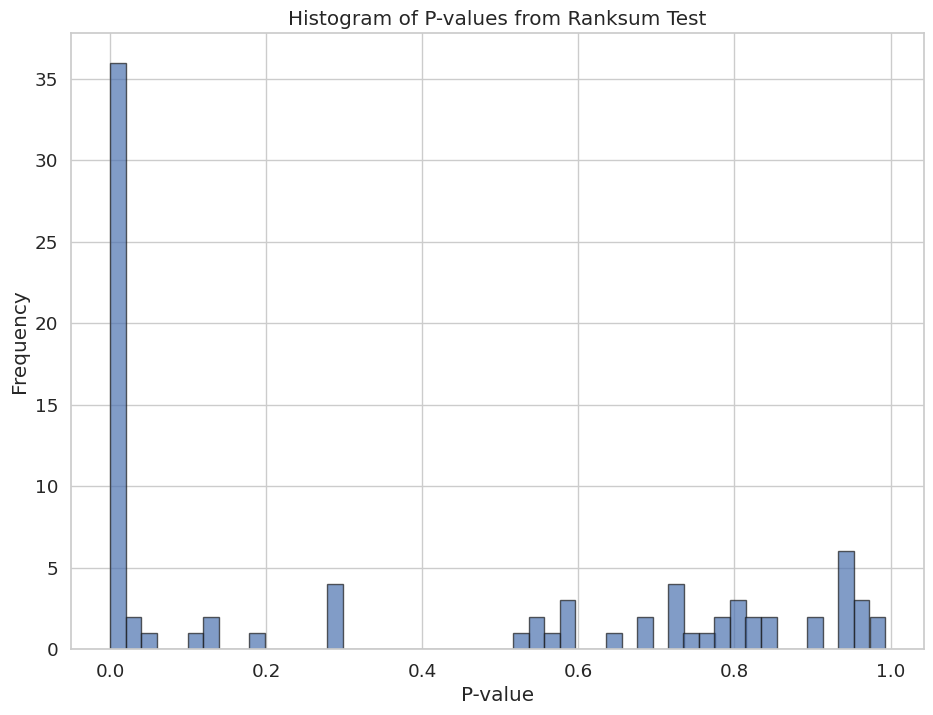

In [48]:
X = df.drop(columns=['Purchase']) # features
y = df['Purchase'] # target label


# Step 3: Compute p-values using the ranksum test
p_values = []
for column in X.columns:
    group1 = X[y == "No"][column]
    group2 = X[y == "Yes"][column]
    stat, p_value = ranksums(group1, group2)
    p_values.append(p_value)

# Step 4: Generate histogram of p-values
plt.hist(p_values, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('P-value')
plt.ylabel('Frequency')
plt.title('Histogram of P-values from Ranksum Test')
plt.show()

## 2. (b) Number of Rejected Hypotheses Using Bonferroni, Standard BH, and Adaptive BH Corrections

In [49]:

# Convert to numpy array
p_values = np.array(p_values)

# (i) Bonferroni correction
bonferroni_rejections = multitest.multipletests(p_values, alpha=0.05, method='bonferroni')[0]

# (ii) Standard BH procedure
bh_rejections = multitest.multipletests(p_values, alpha=0.05, method='fdr_bh')[0]

# (iii) Adaptive BH procedure
# Estimate m0 (number of true null hypotheses)
m = len(p_values)
pi_0 = np.mean(p_values > 0.5) / 0.5
m_0 = pi_0 * m
alpha_adj = 0.05 * m / m_0
adaptive_bh_rejections = multitest.multipletests(p_values, alpha=alpha_adj, method='fdr_bh')[0]

# Print the number of rejections
print(f"Number of hypotheses rejected (Bonferroni): {np.sum(bonferroni_rejections)}")
print(f"Number of hypotheses rejected (Standard BH): {np.sum(bh_rejections)}")
print(f"Number of hypotheses rejected (Adaptive BH): {np.sum(adaptive_bh_rejections)}")


Number of hypotheses rejected (Bonferroni): 30
Number of hypotheses rejected (Standard BH): 36
Number of hypotheses rejected (Adaptive BH): 37


## 2. (c) Sorted P-values with Rejection Thresholds from Bonferroni, Standard BH, and Adaptive BH Corrections

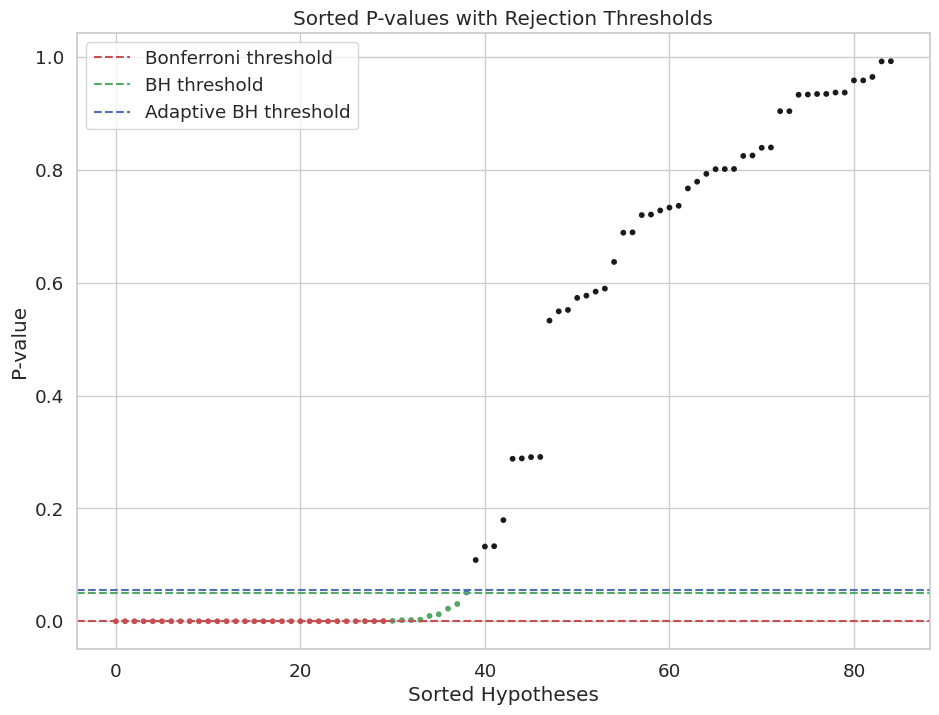

In [52]:

# Plot the sorted p-values with the rejection thresholds
sorted_p_values = np.sort(p_values)
bonferroni_threshold = 0.05 / m
bh_threshold = 0.05

# Colors for each threshold
colors = np.where(sorted_p_values <= bonferroni_threshold, 'r',
                  np.where(sorted_p_values <= bh_threshold, 'g',
                           np.where(sorted_p_values <= alpha_adj, 'b', 'k')))

plt.scatter(range(len(sorted_p_values)), sorted_p_values, c=colors, s=10)  # Smaller points with colors
plt.axhline(y=bonferroni_threshold, color='r', linestyle='--', label='Bonferroni threshold')
plt.axhline(y=bh_threshold, color='g', linestyle='--', label='BH threshold')
plt.axhline(y=alpha_adj, color='b', linestyle='--', label='Adaptive BH threshold')
plt.xlabel('Sorted Hypotheses')
plt.ylabel('P-value')
plt.legend()
plt.title('Sorted P-values with Rejection Thresholds')
plt.show()